# Spam Email Classification using Deep Learning

## Summary
In this project, we aim to build a spam email classifier using a deep learning approach. The classifier will be able to differentiate between spam and ham (non-spam) emails based on the content of the emails. We will follow these steps:

1. Importing necessary libraries: We will use libraries like pandas, numpy, matplotlib, and seaborn for data manipulation and visualization. For text vectorization, we will use CountVectorizer from scikit-learn, and for building the deep learning model, we will use TensorFlow and Keras.

2. Loading and inspecting the dataset: We will load the dataset, which contains emails labeled as 'spam' or 'ham', and inspect its structure.

3. Data cleaning: We will remove any duplicates and handle missing values to ensure the quality of the data.

4. Splitting the data: We will split the dataset into training and testing sets to evaluate the model's performance on unseen data.

5. Vectorizing the text data: We will convert the text data into numerical features using CountVectorizer.

6. Building and training the deep learning model: We will construct a neural network with dense layers, train it on the vectorized text data, and tune it for optimal performance.

7. Evaluating the model: We will assess the model's performance using metrics such as accuracy, precision, recall, and F1 score. Additionally, we will visualize the results using a confusion matrix.

8. Conclusion: We will summarize the findings and performance of the model and suggest potential improvements for future work.


In [67]:
!pip install joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import joblib
%matplotlib inline

# Import Dataset
Next, we load the dataset containing emails categorized as 'spam' or 'ham' (not spam). We then display the first few rows to understand its structure.

In [68]:
df = pd.read_csv('/kaggle/input/spam-email-classification/email.csv')
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Cleaning
## Checking for Null Values
We check for any missing values in the dataset. Since there are no missing values, we proceed to the next step.

In [69]:
df.isna().sum()


Category    0
Message     0
dtype: int64

## Checking for Duplicated Rows
We identify any duplicated rows in the dataset and find 415 duplicates. These duplicates are removed to ensure data quality.

In [70]:
df.duplicated().sum()

415

In [71]:

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Basic Data Cleaning is Done


In [72]:
df= df[df['Category'].isin(['ham', 'spam'])]

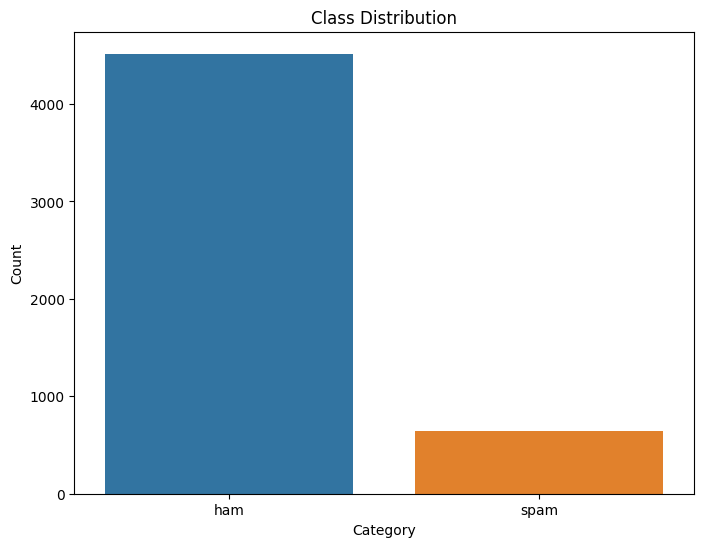

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and cleaned as per your previous steps

# Plotting class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=df)
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


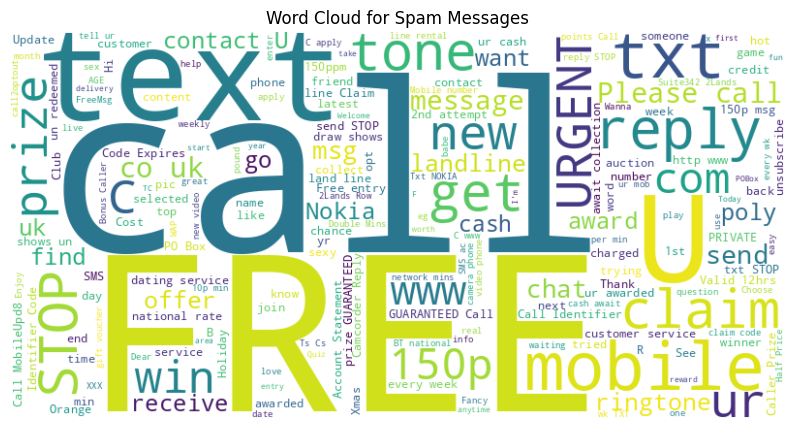

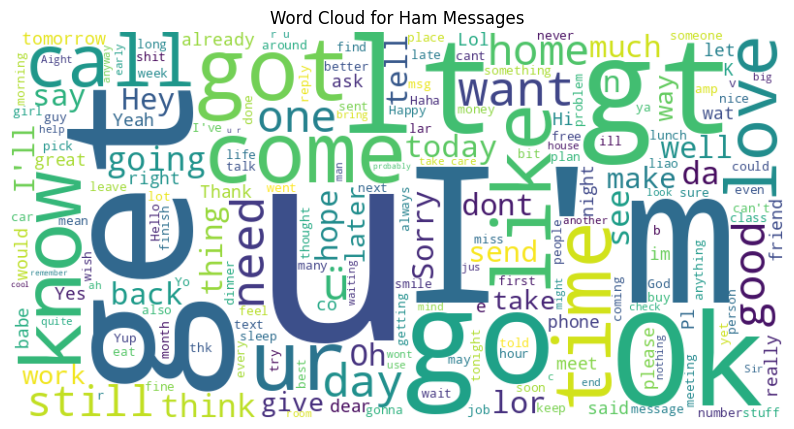

In [74]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources if not already downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Combine all messages for each category
spam_messages = ' '.join(df[df['Category'] == 'spam']['Message'])
ham_messages = ' '.join(df[df['Category'] == 'ham']['Message'])

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(stopwords.words('english'))).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generating word cloud for 'spam' messages
generate_wordcloud(spam_messages, 'Word Cloud for Spam Messages')

# Generating word cloud for 'ham' messages
generate_wordcloud(ham_messages, 'Word Cloud for Ham Messages')


# Vectorizing the Text Data
We use CountVectorizer to convert the text data into numerical features. This step involves fitting the vectorizer on the training data and transforming both the training and testing data.

In [75]:
# Vectorization
cv = CountVectorizer()
x = df['Message']
y = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)  # Convert labels to binary values
x_vectorized = cv.fit_transform(x)

# SMOTE

In [76]:
# SMOTE oversampling
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_vectorized, y)

# Splitting Dataset
We split the dataset into training and testing sets using an 80-20 split. This helps in evaluating the model's performance on unseen data.

In [77]:
# Splitting Dataset
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)


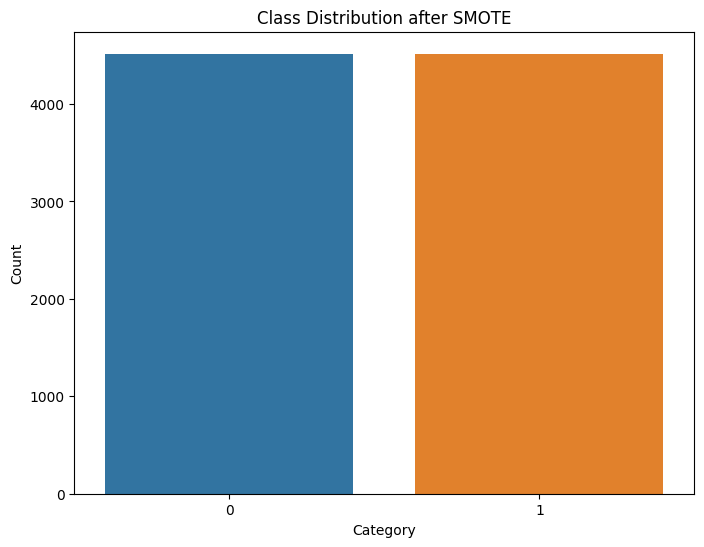

In [78]:
# Visualize class distribution after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution after SMOTE')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Building the Deep Learning Model
We build a deep learning model using TensorFlow and Keras. The model consists of several dense layers with ReLU activation functions and a dropout layer to prevent overfitting.

In [79]:

# Build the Deep Learning Model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model.add(Dropout(0.7))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │       557,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 559,553 (2.13 MB)

 Trainable params: 559,553 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

# Training the Model
We train the model on the vectorized training data.

In [80]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1)


Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7685 - loss: 0.5052 - val_accuracy: 0.9673 - val_loss: 0.1386
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9706 - loss: 0.1158 - val_accuracy: 0.9696 - val_loss: 0.1065
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9826 - loss: 0.0683 - val_accuracy: 0.9745 - val_loss: 0.0944
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9891 - loss: 0.0496 - val_accuracy: 0.9757 - val_loss: 0.0952
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9925 - loss: 0.0321 - val_accuracy: 0.9784 - val_loss: 0.0943
Epoch 6/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9940 - loss: 0.0235 - val_accuracy: 0.9779 - val_loss: 0.0998
Epoch 7/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9958 - loss: 0.0210 - val_accuracy: 0.9795 - val_loss: 0.1054
Epoch 8/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9966 - loss: 0.0123 - val_accuracy: 0.

# Visualize training history

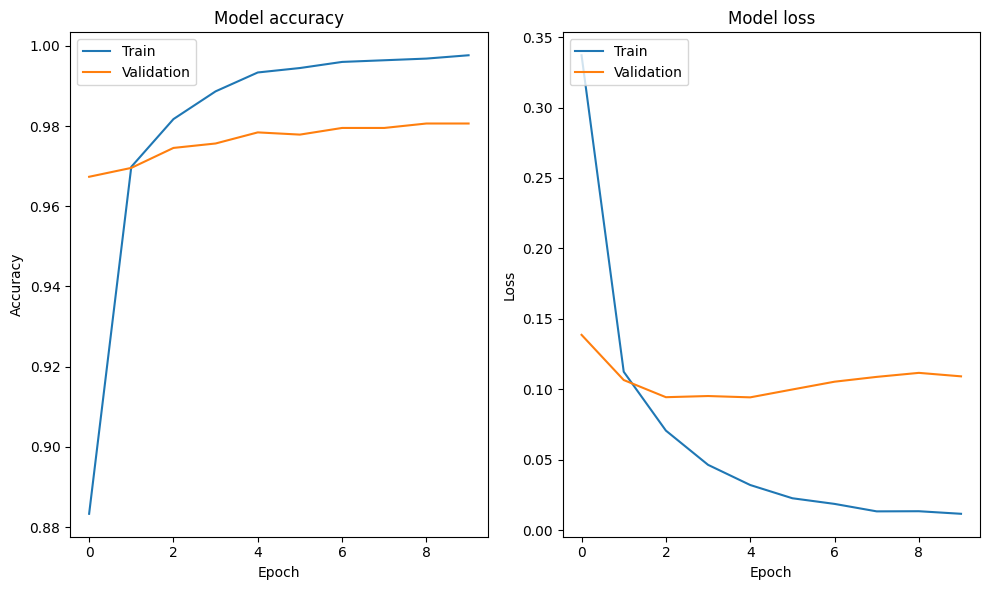

In [81]:

plt.figure(figsize=(10, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluating the Model
We evaluate the model's performance using various metrics such as accuracy, precision, recall, and F1 score.

In [82]:
# Evaluate the model
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}') 

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.9806
Precision: 0.9710
Recall: 0.9912
F1 score: 0.9810


# Confusion Matrix
We visualize the performance of the model using a confusion matrix. This helps in understanding the number of true positive, true negative, false positive, and false negative predictions.

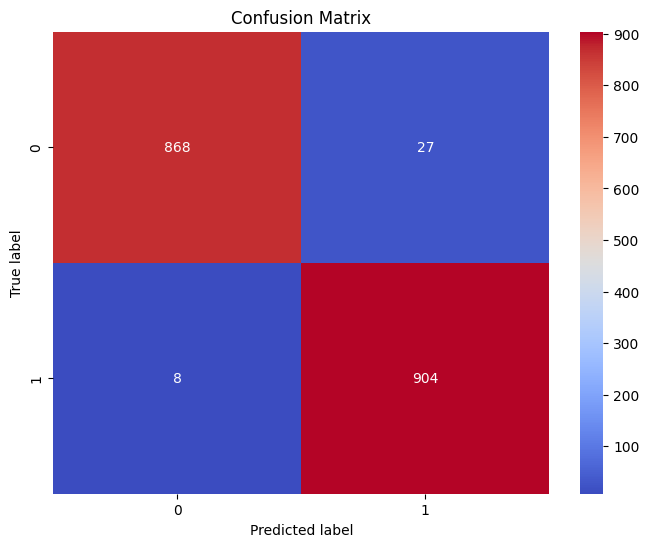

In [83]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt="d")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Saving the Model and Vectorizer for Reuse
To ensure the trained model and the vectorizer can be reused later without retraining, we will save both to disk. We will use the joblib library to save the vectorizer and TensorFlow's model.save method to save the model.

In [84]:
# Save the CountVectorizer to disk
vectorizer_filename = 'count_vectorizer.pkl'
joblib.dump(cv, vectorizer_filename)
# Save the trained model to disk
model_filename = 'spam_classifier_model.h5'
model.save(model_filename)

# Example Code to Save and Load the Model and Vectorizer
Here is the complete code snippet demonstrating how to save and load both the vectorizer and the model:

In [85]:
# import joblib
# import tensorflow as tf

# # Save the CountVectorizer to disk
# vectorizer_filename = 'count_vectorizer.pkl'
# joblib.dump(cv, vectorizer_filename)

# # Save the trained model to disk
# model_filename = 'spam_classifier_model.h5'
# model.save(model_filename)

# # Load the CountVectorizer from disk
# loaded_vectorizer = joblib.load(vectorizer_filename)

# # Load the trained model from disk
# loaded_model = tf.keras.models.load_model(model_filename)

# # Example usage: Vectorize new data and make predictions
# new_emails = ["Congratulations! You've won a free ticket to the Bahamas!", "Please find the attached report for this quarter."]
# new_emails_vectorized = loaded_vectorizer.transform(new_emails)

# # Predict using the loaded model
# predictions = loaded_model.predict(new_emails_vectorized)
# predicted_classes = (predictions > 0.5).astype(int)

# for email, prediction in zip(new_emails, predicted_classes):
#     print(f"Email: {email}\nPrediction: {'Spam' if prediction else 'Ham'}\n")


# Conclusion
In this notebook, we successfully built a spam email classifier using a deep learning model. We performed data cleaning, vectorized the text data, trained the model, and evaluated its performance. The model achieved satisfactory results, as evidenced by the evaluation metrics and the confusion matrix. Further improvements could include trying different architectures, optimizing hyperparameters, or exploring other deep learning techniques to enhance performance.